In [4]:
import numpy as np
import os
from matplotlib import pyplot as plt
import cv2
import random
import pickle

file_list = []
class_list = []

DATADIR = os.getcwd() + "/dataset"

CATEGORIES = [str("class_"+str(i)) for i in range(40)] #Simple initial category

IMG_SIZE = 50 #

for category in CATEGORIES:
    path = os.path.join(DATADIR, category)
    for img in os.listdir(path):
        img_array = cv2.imread(os.path.join(path, img), cv2.IMREAD_GRAYSCALE)

        
 

In [5]:
training_data = []

def create_training_data(): 
    for category in CATEGORIES: 
        path = os.path.join(DATADIR, category)
        class_num = CATEGORIES.index(category)
        for img in os.listdir(path):
            try: 
                img_array = cv2.imread(os.path.join(path, img), cv2.IMREAD_GRAYSCALE)
                new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
                training_data.append([new_array, class_num])

            except Exception as e:
                print(e)

                
create_training_data() 


In [6]:
random.shuffle(training_data)

In [7]:
x_train = []
y_train = []

for features, label in training_data:
    x_train.append(features)
    y_train.append(label)
    
x_train = np.array(x_train).reshape(-1, IMG_SIZE,IMG_SIZE, 1) 
y_train = np.array(y_train)

In [8]:
x_train = x_train/255.0 # normalizing


In [9]:
import tensorflow as tf 
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D
import pickle
from keras.models import model_from_json
from keras.models import load_model
import matplotlib.pyplot as plt


model = Sequential() 

model.add(Conv2D(32, (3,3), input_shape = x_train.shape[1:]))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(64, (3, 3)))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(64, (3, 3)))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

# 2 hidden layers
model.add(Flatten())
model.add(Dense(128))
model.add(Activation("relu"))

model.add(Dense(128))
model.add(Activation("relu"))

# The output layer with 40 neurons, for 40 classes
model.add(Dense(40))
model.add(Activation("softmax"))

# Compiling the model using some basic parameters
model.compile(loss="sparse_categorical_crossentropy"
              ,optimizer="adam"
              ,metrics=["accuracy"])

model.summary()

Using TensorFlow backend.


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 48, 48, 32)        320       
_________________________________________________________________
activation (Activation)      (None, 48, 48, 32)        0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 24, 24, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 22, 22, 64)        18496     
_________________________________________________________________
activation_1 (Activation)    (None, 22, 22, 64)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 11, 11, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 9, 9, 64)          3

In [10]:
history = model.fit(x_train, y_train, batch_size=32, epochs=40, validation_split=0.2)

Train on 3096 samples, validate on 344 samples
Epoch 1/40
3096/3096 [==============================] - 11s 3ms/sample - loss: 3.4058 - accuracy: 0.0924 - val_loss: 2.6239 - val_accuracy: 0.2587
Epoch 2/40
3096/3096 [==============================] - 8s 3ms/sample - loss: 1.9541 - accuracy: 0.4293 - val_loss: 1.5846 - val_accuracy: 0.5291
Epoch 3/40
3096/3096 [==============================] - 7s 2ms/sample - loss: 1.2638 - accuracy: 0.6108 - val_loss: 1.2121 - val_accuracy: 0.6134
Epoch 4/40
3096/3096 [==============================] - 7s 2ms/sample - loss: 0.8743 - accuracy: 0.7125 - val_loss: 0.9471 - val_accuracy: 0.7035
Epoch 5/40
3096/3096 [==============================] - 7s 2ms/sample - loss: 0.6991 - accuracy: 0.7668 - val_loss: 0.7123 - val_accuracy: 0.7762
Epoch 6/40
3096/3096 [==============================] - 7s 2ms/sample - loss: 0.5020 - accuracy: 0.8291 - val_loss: 0.6481 - val_accuracy: 0.8110
Epoch 7/40
3096/3096 [==============================] - 8s 3ms/sample - loss

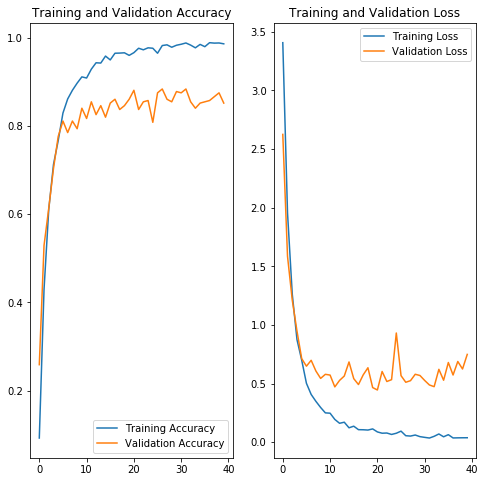

In [11]:
epochs = 40
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [12]:
model.save('saved_models/40_class_no_aug')

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
INFO:tensorflow:Assets written to: saved_models/40_class_no_aug/assets
